# Communication Systems 3 (ENG3014)
### Prof. D. C. Hutchings, James Watt School of Engineering, University of Glasgow
## Discrete Fourier Transform Examples from Lectures and Tutorials

In [1]:
from __future__ import division
import numpy as np
import scipy.fftpack as fp
import scipy.ndimage as ip
import scipy.signal as signal
import matplotlib.pyplot as plt
from sympy import symbols, cos, Abs
from sympy import init_printing
init_printing(use_latex='mathjax')

t = symbols('t', real=True)

dim = 128
nu0 = 8

### FFT of a sampled sinudoid

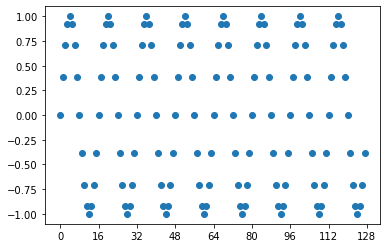

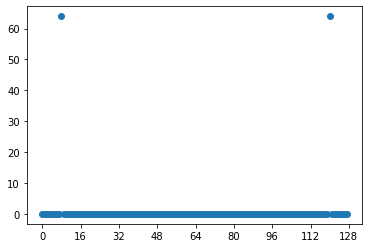

In [2]:
S = np.sin(2*np.pi*nu0*np.arange(dim)/dim)
plt.figure()
plt.plot(S,'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()
plt.figure()
plt.plot(abs(fp.fft(S)),'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()

### FFT of a sampled rect function

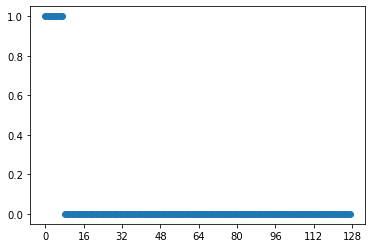

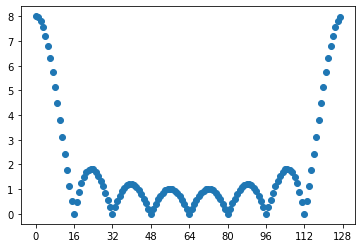

In [3]:
R = np.concatenate((np.ones(nu0),np.zeros(dim-nu0)))
plt.figure()
plt.plot(R,'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()
plt.figure()
plt.plot(abs(fp.fft(R)),'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()

### FFT of a sampled rectangular wave

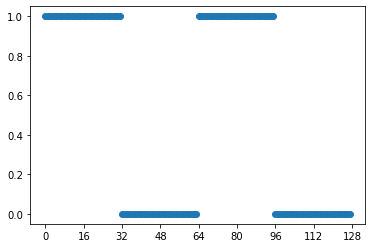

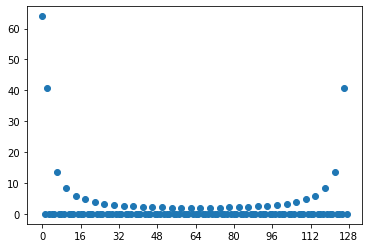

In [4]:
nu0 = 32
R = np.concatenate((np.ones(nu0),np.zeros(nu0)))
R = np.tile(R,dim//(2*nu0))
plt.figure()
plt.plot(R,'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()
plt.figure()
plt.plot(abs(fp.fft(R)),'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()

### a sampled single sided exponential

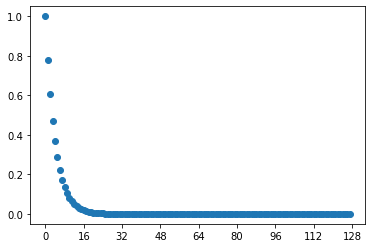

In [5]:
S = np.exp(-nu0*np.arange(dim)/dim)
plt.figure()
plt.plot(S,'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()

### discrete convolution of rectangular wave and single-sided exponential by
1. discrete convolution
2. FFT functions, multiply and IFFT

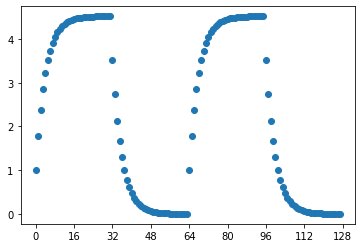

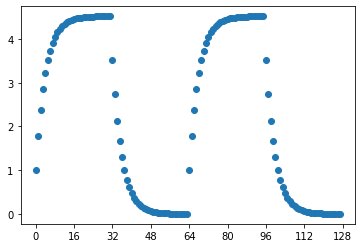

In [6]:
T1 = ip.convolve(R,S,mode="wrap")
plt.figure()
plt.plot(T1,'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()
T2 = fp.ifft(fp.fft(R)*fp.fft(S))
plt.figure()
plt.plot(np.real(T2),'o')
plt.xticks(np.linspace(0,dim,9))
plt.show()

### Frequency transfer function of a boxcar FIR digital filter
$|H(\omega)| = \frac{1}{3} \left| 1+2.*\cos \omega T \right|$

<Figure size 432x288 with 0 Axes>

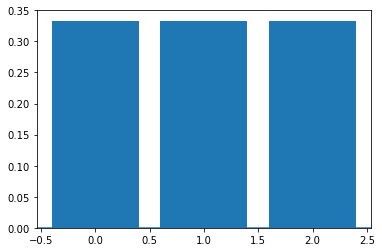

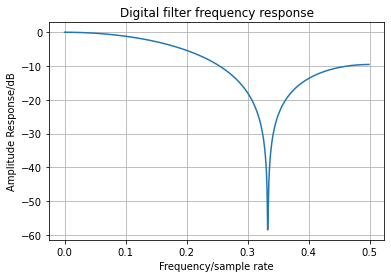

In [7]:
mytaps = [1./3.,1./3.,1./3.]
mydelays = np.arange(len(mytaps))
plt.figure()
fig, ax = plt.subplots()
ax.bar(mydelays,mytaps)
ax.axhline()
plt.show()

w1, h1 = signal.freqz(mytaps)

plt.title('Digital filter frequency response')
plt.plot(w1/2/np.pi, 20*np.log10(np.abs(h1)))
plt.ylabel('Amplitude Response/dB')
plt.xlabel('Frequency/sample rate')
plt.grid()
plt.show()

### FIR filter design
use scipy.signal firwin with 32 taps
1. low-pass filter with corner frequency 0.15 sample rate
2. bandpass filter at 0.19 sample rate
e.g. if sample rate is 100k, then these correspond to filters in FM stereo signals

<Figure size 432x288 with 0 Axes>

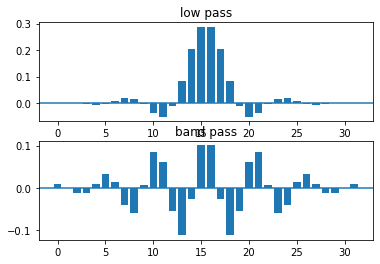

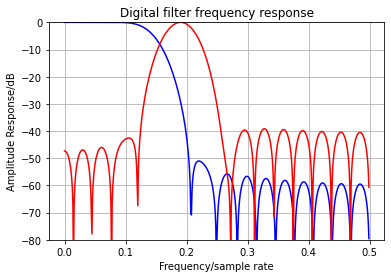

In [8]:
numtaps = 32
mydelays = np.arange(numtaps)
b1 = signal.firwin(numtaps, 0.3)
b2 = signal.firwin(numtaps, [0.36, 0.40], pass_zero=False)

plt.figure()
fig, axs = plt.subplots(2, 1)
axs[0].bar(mydelays,b1)
axs[0].axhline()
axs[0].set_title("low pass")
axs[1].bar(mydelays,b2)
axs[1].axhline()
axs[1].set_title("band pass")
plt.show()

w1, h1 = signal.freqz(b1)
w2, h2 = signal.freqz(b2)
plt.figure()
plt.title('Digital filter frequency response')
plt.plot(w1/2/np.pi, 20*np.log10(np.abs(h1)), 'b')
plt.plot(w2/2/np.pi, 20*np.log10(np.abs(h2)), 'r')
plt.ylabel('Amplitude Response/dB')
plt.xlabel('Frequency/sample rate')
plt.ylim(-80,0)
plt.grid()
plt.show()